In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

I can represent the mixture clearing out, but I want to show it piling up. I may need different functions for the plasma-mixture and mixture-sediment interfaces because the boundary conditions are different. Or, I could have each function give 2 outputs.

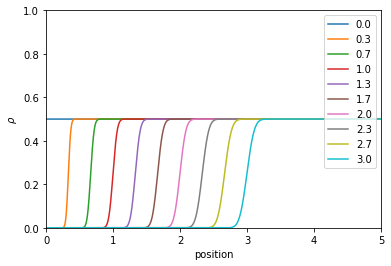

In [14]:
def get_ρf(ρ,ρ_in): # concentrations on the faces. Sets up a 0 flux condition by causing the left-most concentration to be the same as the second
    ρf = np.zeros(ngrdf)
    ρf[0] = ρ[0] # change the concentration of the left-most face to be whatever. It should equal the same value as #2 for 0 flux
    ρf[1:] = ρ[:]
    return ρf

def get_cf(ρ):
    cf = -np.ones(ngrdf) # This should be modified to give a speed given a concentration vector
    cf[0] = 0 # sets the wave speed to 0 on the left border.
    return cf

def get_qf(ρ,ρ_in):
    return  get_cf(ρ) * get_ρf(ρ,ρ_in)

def rhsf(ρ,t):
    ρ_in = 0.0
    qf = get_qf(ρ,ρ_in)
    dρdt = 1/Δx*(qf[1:]-qf[:-1])
    return dρdt

#---------------------------

ngrd = 2000
L    = 5
tend = 3
ntimes = 10

times = np.linspace(0,tend,ntimes)
ngrdf = ngrd+1
Δx    = L/ngrd
xf    = np.linspace(0,L,ngrdf)
x     = (xf[1:] + xf[:-1])/2

ρ0  = np.ones(ngrd)*0.5
# ρ0[np.where(x>1)]=0  #I can give it a variable initial condition, and the shocks propagate just fine.
# ρ0[np.where(x>1.1)]=0.1
# # ρ0[500:] = 1.0

ρall = odeint(rhsf, ρ0, times)

for j in range(ntimes):
    plt.plot(x,ρall[j,:],label=round(times[j],1))
    
plt.xlabel('position')
plt.ylabel(r'$\rho$')
plt.xlim([0,L])
plt.ylim([0,1])
plt.legend(loc=1);

The Current code shows the supernatant-mixture interface. There is zero inlet flux of RBCs.

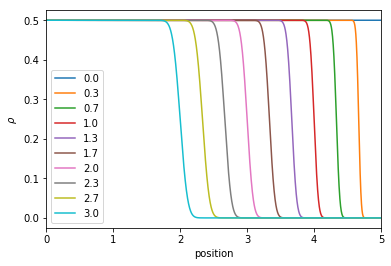

In [26]:
def get_ρf(ρ,ρ_in): 
    ρf = np.zeros(ngrdf)
    # change the concentration of the right-most face to be whatever. It should equal the same value as #2 for 0 flux
    # The value of ρf[-1] is the maximum concentration.
    ρf[:-1] = ρ[:]
    ρf[-1] = 0.75 #ρ[-1] 
#     ρf[0] = ρ_in
    return ρf

def get_cf(ρ):
    cf = -np.ones(ngrdf) # This should be modified to give a speed given a concentration vector
    cf[-1] = 0 # sets the wave speed to 0 on the right border. This makes the actual flux.
    return cf

def get_qf(ρ,ρ_in):
    return  get_cf(ρ) * get_ρf(ρ,ρ_in)

def rhsf(ρ,t):
    '''
    Implement if statements to track interfaces!
    The only difference between the forward moving wave and the backward moving wave is the 
    sign of the dρdt term.
    '''
    ρ_in = 0
    qf = get_qf(ρ,ρ_in)
    dρdt = -1/Δx*(qf[1:]-qf[:-1])
    return dρdt

#---------------------------

ngrd = 2000
L    = 5
tend = 3
ntimes = 10

times = np.linspace(0,tend,ntimes)
ngrdf = ngrd+1
Δx    = L/ngrd
xf    = np.linspace(0,L,ngrdf)
x     = (xf[1:] + xf[:-1])/2

ρ0  = np.ones(ngrd)*0.5
# ρ0[-20:-1] = 1
ρall = odeint(rhsf, ρ0, times)

for j in range(ntimes):
    plt.plot(x,ρall[j,:],label=round(times[j],1))
    
    
plt.xlabel('position')
plt.ylabel(r'$\rho$')
plt.xlim([0,L]);
# plt.ylim([0,1])
plt.legend(loc=0);

In [14]:
len(x)

2000

In [5]:
def parabola(x,a=0.16,b=-0.8,c=1):
    return a*x**2+b*x+c

Does this current scheme only propagate shock? I should try a non-uniform initial condition and see the sediment front speed changes. I also need to combine supernatant and sediment into one curve/code.

To ask Dr. Lignell:
> How do I track interfaces moving at opposite different speeds? Do I need different integration schemes for each interface? It seems like the "upwind" direction has opposing signs for the two interfaces.

What are the three concentration states/inputs? sediment concentration, mixture concentration, input concentration.  
If I don't consider that a sediment forms, then I'll only have the supernatant border... That could be useful, but limited... worth a try.